In [261]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from google.colab import files

In [147]:
def I(lower, upper,x): 
  return np.where((x>upper) , 0, np.where((x<lower), 0,1))
def g(height, lower, upper, x):
  return height*I(lower,upper,x)
def activation(y):
  return int((y>=0.0))
def f_real(x): 
  return (-x**2 + 1)

In [249]:
N = 3 
f_0 = np.zeros(200)
a = -1
b = 1
h_1 = 0.5 
a_i = np.zeros(N)
b_i = np.zeros(N)
h_i = np.zeros(N)
f_hat = np.zeros((N,200))
delta = (b-a)/N
x = np.arange(-1,1,0.01)
a_i[0] = a
b_i[0] = a_i[0] + delta
h_i[0]= (f_real(b_i[0] )+ f_real(a_i[0] ))/2
f_hat[0] = np.add(f_0 , g(h_i[0], a_i[0], b_i[0], x))

for i in range(1,N):
  a_i[i] = a_i[i-1] + (delta+0.000001)
  b_i[i] = a_i[i] + delta  
  h_i[i] = (f_real(b_i[i] )+ f_real(a_i[i] ))/2
  f_hat[i] = np.add(f_hat[i-1]  , g(h_i[i], a_i[i], b_i[i], x))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

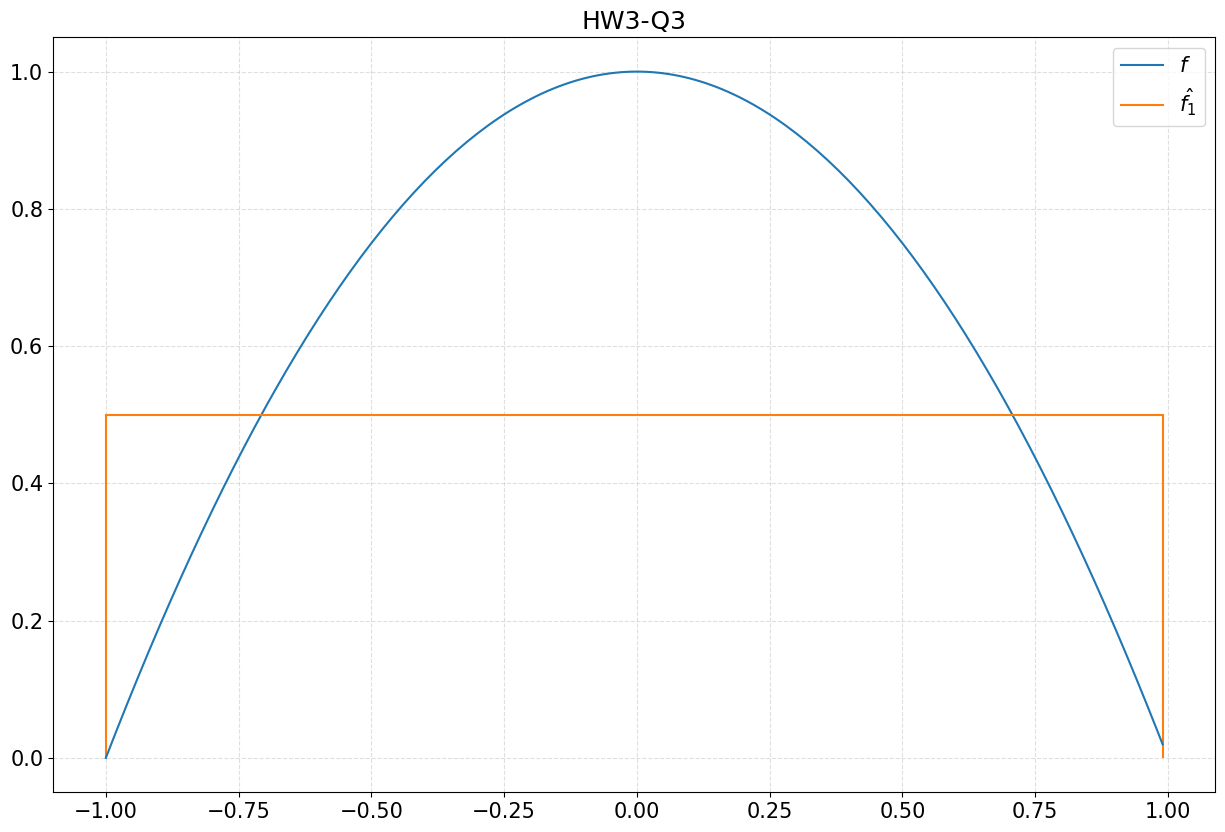

In [275]:
figure(figsize=(15, 10), dpi=100)
plt.rcParams.update({'font.size': 15})

f = -x ** 2 +1

# Create the plot
plt.plot(x,f,label=r'$f$')
plt.plot(x,np.repeat(0.5,200),label=r'$\hat{f_{1}}$')
plt.vlines(x=x[0], ymin=0.0, ymax=0.5, color = "#ff7f0e")
plt.vlines(x=x[-1], ymin=0.0, ymax=0.5, color = "#ff7f0e")

# plt.plot(x,(1/2)* y + 7,label='y = (1/2) * (x**2) + 7')
# plt.plot(x,y + 3,label='y = x**2 + 3')
# plt.plot(x,y - 5,label='y = x**2 - 5')
# plt.plot(x,y - 3,label='y = x**2 - 3')

# Add a title
plt.title('HW3-Q3')

# # Add X and y Label
# plt.xlabel('x axis')
# plt.ylabel('y axis')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

# Add a Legend
plt.legend()

plt.savefig("0.png")
files.download("0.png")
# Show the plot
plt.show() 

In [ ]:
def  get_output(x):  
  h_1 = torch.matmul(w_1, x)+ b_1
  print("h_1 before activation:", h_1)
  h_1 =  (h_1>0.0).float()
  print("h_1 after activation:", h_1)
  y = torch.matmul(w_2, h_1) + b_2
  print("y before activation:", y)
  y =  (y>0.0).float()
  print("y after activation:", y)
  print("\n")

In [ ]:
w_1 = torch.tensor([[1, -1, 0, 0], [0, 1, -1, 0], [0, 0, 1, -1]], dtype=torch.float32)
# w_1 = torch.tensor([[-1, 1, 0, 0], [0, -1, 1, 0], [0, 0, -1, 1]], dtype=torch.float32)
b_1 = torch.tensor([0.00001,0.00001,0.000001], dtype=torch.float32)
w_2 = torch.tensor([-1, -1, -1], dtype=torch.float32)
b_2 = torch.tensor([0.1], dtype=torch.float32)
w_1, w_2, b_1, b_2

(tensor([[ 1., -1.,  0.,  0.],
         [ 0.,  1., -1.,  0.],
         [ 0.,  0.,  1., -1.]]),
 tensor([-1., -1., -1.]),
 tensor([1.0000e-05, 1.0000e-05, 1.0000e-06]),
 tensor([0.1000]))

In [ ]:
# x = torch.rand(4) 
x = torch.tensor([1.0, 2.0, 2.0, -1.])
x_sorted, _ = torch.sort(x)
x_sorted_descending, _ = torch.sort(x, descending=True)
print(x, x_sorted, x_sorted_descending, "\n")

get_output(x)
get_output(x_sorted)
get_output(x_sorted_descending)

tensor([ 1.,  2.,  2., -1.]) tensor([-1.,  1.,  2.,  2.]) tensor([ 2.,  2.,  1., -1.]) 

h_1 before activation: tensor([-9.9999e-01,  1.0000e-05,  3.0000e+00])
h_1 after activation: tensor([0., 1., 1.])
y before activation: tensor([-1.9000])
y after activation: tensor([0.])


h_1 before activation: tensor([-2.0000e+00, -9.9999e-01,  1.0000e-06])
h_1 after activation: tensor([0., 0., 1.])
y before activation: tensor([-0.9000])
y after activation: tensor([0.])


h_1 before activation: tensor([1.0000e-05, 1.0000e+00, 2.0000e+00])
h_1 after activation: tensor([1., 1., 1.])
y before activation: tensor([-2.9000])
y after activation: tensor([0.])


